### Importing Libraries

In [106]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from imblearn.combine import SMOTEENN
import warnings
warnings.filterwarnings('ignore')

#### Reading csv

In [107]:
df=pd.read_csv("tel_churn.csv")
df.head()

,Unnamed: 0,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,0,29.85,29.85,0,True,False,False,True,True,...,False,False,True,False,True,False,False,False,False,False
1,1,0,56.95,1889.50,0,False,True,True,False,True,...,False,False,False,True,False,False,True,False,False,False
2,2,0,53.85,108.15,1,False,True,True,False,True,...,False,False,False,True,True,False,False,False,False,False
3,3,0,42.30,1840.75,0,False,True,True,False,True,...,True,False,False,False,False,False,False,True,False,False
4,4,0,70.70,151.65,1,True,False,True,False,True,...,False,False,True,False,True,False,False,False,False,False


In [108]:
df=df.drop('Unnamed: 0',axis=1)

In [109]:
x=df.drop('Churn',axis=1)
x

,SeniorCitizen,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,29.85,29.85,True,False,False,True,True,False,True,...,False,False,True,False,True,False,False,False,False,False
1,0,56.95,1889.50,False,True,True,False,True,False,False,...,False,False,False,True,False,False,True,False,False,False
2,0,53.85,108.15,False,True,True,False,True,False,False,...,False,False,False,True,True,False,False,False,False,False
3,0,42.30,1840.75,False,True,True,False,True,False,True,...,True,False,False,False,False,False,False,True,False,False
4,0,70.70,151.65,True,False,True,False,True,False,False,...,False,False,True,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0,84.80,1990.50,False,True,False,True,False,True,False,...,False,False,False,True,False,True,False,False,False,False
7028,0,103.20,7362.90,True,False,False,True,False,True,False,...,False,True,False,False,False,False,False,False,False,True
7029,0,29.60,346.45,True,False,False,True,False,True,True,...,False,False,True,False,True,False,False,False,False,False
7030,1,74.40,306.60,False,True,False,True,True,False,False,...,False,False,False,True,True,False,False,False,False,False


In [110]:
y=df['Churn']
y

0       0
1       0
2       1
3       0
4       1
       ..
7027    0
7028    0
7029    0
7030    1
7031    0
Name: Churn, Length: 7032, dtype: int64

#### Train Test Split

In [111]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

#### Decision Tree Classifier

In [112]:
model_dt=DecisionTreeClassifier(criterion = "gini",random_state = 100,max_depth=6, min_samples_leaf=8)

In [113]:
model_dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [114]:
y_pred=model_dt.predict(x_test)
y_pred

array([0, 0, 0, ..., 1, 0, 1], dtype=int64)

In [115]:
model_dt.score(x_test,y_test)

0.7867803837953091

In [116]:
print(classification_report(y_test, y_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86      1037
           1       0.61      0.51      0.56       370

    accuracy                           0.79      1407
   macro avg       0.72      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407



##### As you can see that the accuracy is quite low, and as it's an imbalanced dataset, we shouldn't consider Accuracy as our metrics to measure the model, as Accuracy is cursed in imbalanced datasets.

##### Hence, we need to check recall, precision & f1 score for the minority class, and it's quite evident that the precision, recall & f1 score is too low for Class 1, i.e. churned customers.

##### Hence, moving ahead to call SMOTEENN (UpSampling + ENN)

In [117]:
sm = SMOTEENN()
X_resampled, y_resampled = sm.fit_resample(x,y)



In [118]:
xr_train,xr_test,yr_train,yr_test=train_test_split(X_resampled, y_resampled,test_size=0.2)

In [119]:
model_dt_smote=DecisionTreeClassifier(criterion = "gini",random_state = 100,max_depth=6, min_samples_leaf=8)

In [120]:
model_dt_smote.fit(xr_train,yr_train)
yr_predict = model_dt_smote.predict(xr_test)
model_score_r = model_dt_smote.score(xr_test, yr_test)
print(model_score_r)
print(metrics.classification_report(yr_test, yr_predict))

0.942390369733448
              precision    recall  f1-score   support

           0       0.95      0.92      0.93       513
           1       0.94      0.96      0.95       650

    accuracy                           0.94      1163
   macro avg       0.94      0.94      0.94      1163
weighted avg       0.94      0.94      0.94      1163



In [121]:
print(metrics.confusion_matrix(yr_test, yr_predict))

[[472  41]
 [ 26 624]]


##### Now we can see quite better results, i.e. Accuracy: 92 %, and a very good recall, precision & f1 score for minority class.

##### Let's try with some other classifier.

#### Random Forest Classifier

In [122]:
from sklearn.ensemble import RandomForestClassifier

In [123]:
model_rf=RandomForestClassifier(n_estimators=100, criterion='gini', random_state = 100,max_depth=6, min_samples_leaf=8)

In [124]:
model_rf.fit(x_train,y_train)

RandomForestClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [125]:
y_pred=model_rf.predict(x_test)

In [126]:
model_rf.score(x_test,y_test)

0.7931769722814499

In [127]:
print(classification_report(y_test, y_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1037
           1       0.65      0.46      0.54       370

    accuracy                           0.79      1407
   macro avg       0.74      0.69      0.70      1407
weighted avg       0.78      0.79      0.78      1407



### using smote

In [128]:
sm = SMOTEENN()
X_resampled1, y_resampled1 = sm.fit_resample(x,y)

In [129]:
xr_train1,xr_test1,yr_train1,yr_test1=train_test_split(X_resampled1, y_resampled1,test_size=0.2)

In [130]:
model_rf_smote=RandomForestClassifier(n_estimators=100, criterion='gini', random_state = 100,max_depth=6, min_samples_leaf=8)

In [131]:
model_rf_smote.fit(xr_train1,yr_train1)

RandomForestClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [132]:
yr_predict1 = model_rf_smote.predict(xr_test1)

In [133]:
model_score_r1 = model_rf_smote.score(xr_test1, yr_test1)

In [134]:
print(model_score_r1)
print(metrics.classification_report(yr_test1, yr_predict1))

0.9463373083475298
              precision    recall  f1-score   support

           0       0.96      0.92      0.94       517
           1       0.94      0.97      0.95       657

    accuracy                           0.95      1174
   macro avg       0.95      0.94      0.95      1174
weighted avg       0.95      0.95      0.95      1174



In [135]:
print(metrics.confusion_matrix(yr_test1, yr_predict1))

[[476  41]
 [ 22 635]]


##### With RF Classifier, also we are able to get quite good results, infact better than Decision Tree.



#### Logistic Regression Model

In [136]:
from sklearn.linear_model import LogisticRegression
lg_model=LogisticRegression()
lg_model.fit(x_train ,y_train)

LogisticRegression()

In [137]:
pred_lg=lg_model.predict(x_test)

In [138]:
mat_test=confusion_matrix(y_test ,pred_lg)
mat_test

array([[941,  96],
       [191, 179]], dtype=int64)

In [139]:
print(classification_report(y_test, pred_lg, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1037
           1       0.65      0.48      0.56       370

    accuracy                           0.80      1407
   macro avg       0.74      0.70      0.71      1407
weighted avg       0.78      0.80      0.79      1407



In [140]:
pred_proba_test=lg_model.predict_proba(x_test)
len(pred_proba_test)

1407

In [141]:
from sklearn.metrics import roc_auc_score ,roc_curve


In [142]:
x_test.shape

(1407, 50)

In [143]:
roc_auc_score(y_test,pred_proba_test[: ,1])

0.8383226041856707

In [144]:
fpr,tpr,thres=roc_curve(y_test ,pred_proba_test[: ,1])

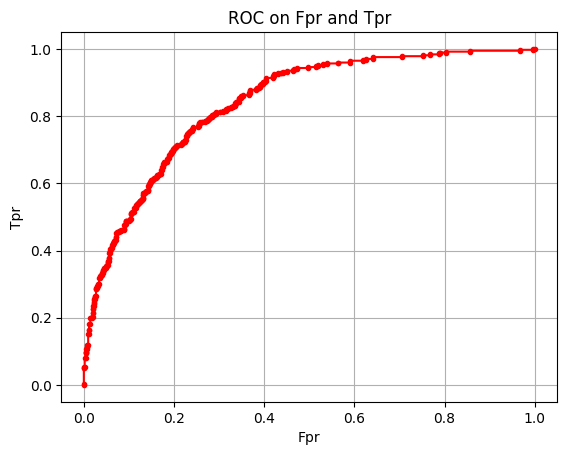

In [145]:
plt.plot(fpr ,tpr ,marker='.',color='red')
plt.xlabel('Fpr')
plt.ylabel('Tpr')
plt.title("ROC on Fpr and Tpr")
plt.grid()

#### with smote

In [146]:
sm = SMOTEENN()
X_resampled2, y_resampled2 = sm.fit_resample(x,y)

In [147]:
xr_train2,xr_test2,yr_train2,yr_test2=train_test_split(X_resampled2, y_resampled2,test_size=0.2)

In [148]:
model_lg_smote=LogisticRegression()

In [149]:
model_lg_smote.fit(xr_train2,yr_train2)

LogisticRegression()

In [150]:
pred_lg1= model_lg_smote.predict(xr_test2)

In [151]:
mat_test1=confusion_matrix(yr_test2 ,pred_lg1)
mat_test1

array([[502,  45],
       [ 31, 593]], dtype=int64)

In [152]:
print(classification_report(yr_test2, pred_lg1, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.94      0.92      0.93       547
           1       0.93      0.95      0.94       624

    accuracy                           0.94      1171
   macro avg       0.94      0.93      0.93      1171
weighted avg       0.94      0.94      0.94      1171



In [153]:
pred_proba_test1=model_lg_smote.predict_proba(xr_test2)
len(pred_proba_test1)

1171

In [154]:
xr_test2.shape

(1171, 50)

In [155]:
roc_auc_score(yr_test2,pred_proba_test1[: ,1])

0.9841618619040923

In [156]:
fpr1,tpr1,thres1=roc_curve(yr_test2 ,pred_proba_test1[: ,1])

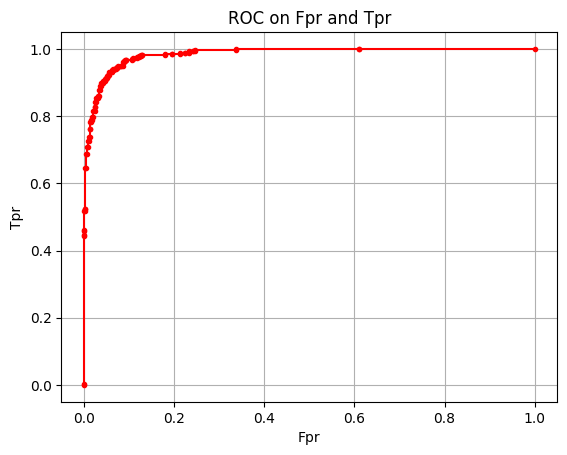

In [157]:
plt.plot(fpr1 ,tpr1 ,marker='.',color='red')
plt.xlabel('Fpr')
plt.ylabel('Tpr')
plt.title("ROC on Fpr and Tpr")
plt.grid()